<a href="https://colab.research.google.com/github/VaibhavBhusawale/-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project_(Shaloy%2C_Smriti%2C_Vaibhav).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Hypothesis for the problem:**

1. The number of bikes rented during rainfall/snowfall reduces.
2. The number of bikes rented increases during peak hours.
3. The number of bikes rented during weekends is less compared to weekdays.
4. The number of bikes rented on holidays is less compared to that of working days.
5. The number of bikes rented reduces if there is high humidity.
6. The number of bikes rented on days with high solar radiations is low.
7. The number of bikes rented on average in summer is higher compared to other seasons.

# **Data Warehousing:**

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing data

path = '/content/drive/MyDrive/Bike sharing demand prediction - Shaloy Lewis/Copy of SeoulBikeData.csv'

df = pd.read_csv(path, encoding='iso-8859-1')

In [ ]:
# Basic inspection

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# updating the attribute names

df = df.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temp', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'})

In [ ]:
df.head()

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.shape

(8760, 14)

Checking the missing values:

In [ ]:
df.isnull().sum()

date                 0
rented_bike_count    0
hour                 0
temp                 0
humidity             0
wind_speed           0
visibility           0
dew_point_temp       0
solar_radiation      0
rainfall             0
snowfall             0
seasons              0
holiday              0
func_day             0
dtype: int64

The are no missing values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               8760 non-null   object 
 1   rented_bike_count  8760 non-null   int64  
 2   hour               8760 non-null   int64  
 3   temp               8760 non-null   float64
 4   humidity           8760 non-null   int64  
 5   wind_speed         8760 non-null   float64
 6   visibility         8760 non-null   int64  
 7   dew_point_temp     8760 non-null   float64
 8   solar_radiation    8760 non-null   float64
 9   rainfall           8760 non-null   float64
 10  snowfall           8760 non-null   float64
 11  seasons            8760 non-null   object 
 12  holiday            8760 non-null   object 
 13  func_day           8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ KB


In [ ]:
df.describe()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
df.describe().shape

(8, 10)

# **Visual Inspection:**

In [ ]:
# converting date column from string to datetime features

df['date'] = pd.to_datetime(df.date)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               8760 non-null   datetime64[ns]
 1   rented_bike_count  8760 non-null   int64         
 2   hour               8760 non-null   int64         
 3   temp               8760 non-null   float64       
 4   humidity           8760 non-null   int64         
 5   wind_speed         8760 non-null   float64       
 6   visibility         8760 non-null   int64         
 7   dew_point_temp     8760 non-null   float64       
 8   solar_radiation    8760 non-null   float64       
 9   rainfall           8760 non-null   float64       
 10  snowfall           8760 non-null   float64       
 11  seasons            8760 non-null   object        
 12  holiday            8760 non-null   object        
 13  func_day           8760 non-null   object        
dtypes: datet

The date column is converted to datetime datatype

In [ ]:
# creating a new attribute 'month'

df['month'] = pd.DatetimeIndex(df['date']).month

In [ ]:
# unique entries in month

df.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

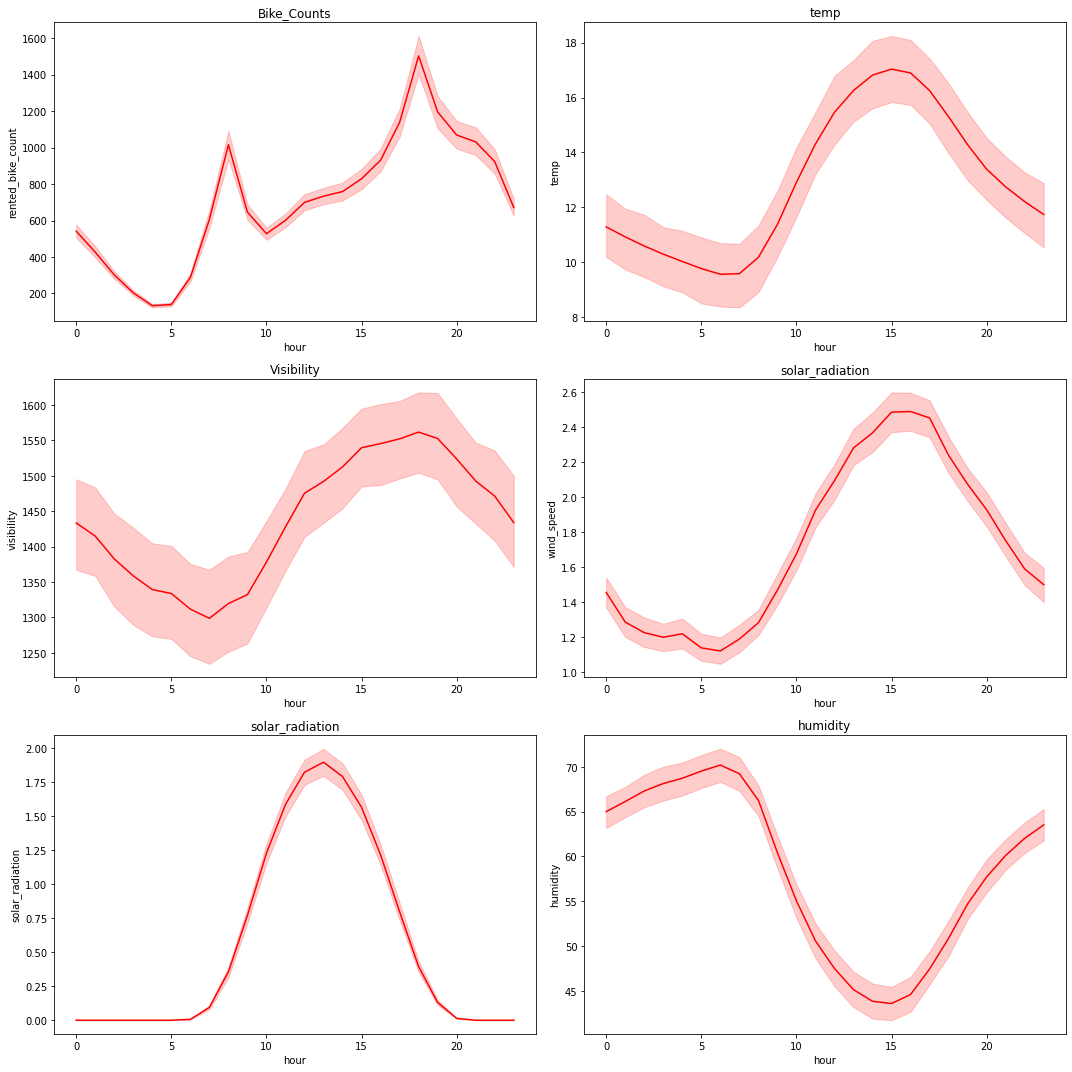

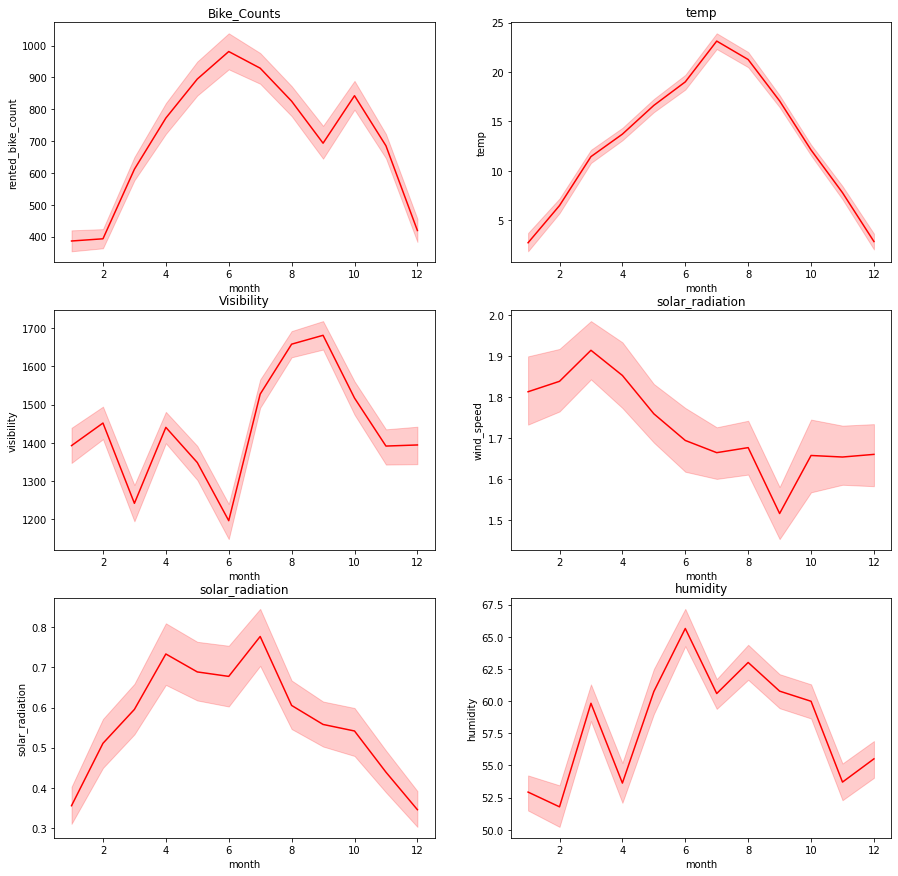

In [ ]:
y= [['rented_bike_count', 'temp'], ['visibility', 'wind_speed'], ['solar_radiation', 'humidity']]
title = [['Bike_Counts', 'temp'], ['Visibility', 'solar_radiation'], 
         ['solar_radiation', 'humidity']]

f, ax = plt.subplots(3,2,figsize=(15,15))

for i in range(3):
    for j in range(2):
        sns.lineplot(data=df, x='hour', y=y[i][j], ax=ax[i][j], color='r')
        ax[i][j].set_title(title[i][j])



plt.tight_layout()

m = [['rented_bike_count', 'temp'], ['visibility', 'wind_speed'], ['solar_radiation', 'humidity']]
title = [['Bike_Counts', 'temp'], ['Visibility', 'solar_radiation'], 
         ['solar_radiation', 'humidity']]

f, ax = plt.subplots(3,2,figsize=(15,15))

for i in range(3):
    for j in range(2):
        sns.lineplot(data=df, x='month', y=m[i][j], ax=ax[i][j], color='r')
        ax[i][j].set_title(title[i][j])


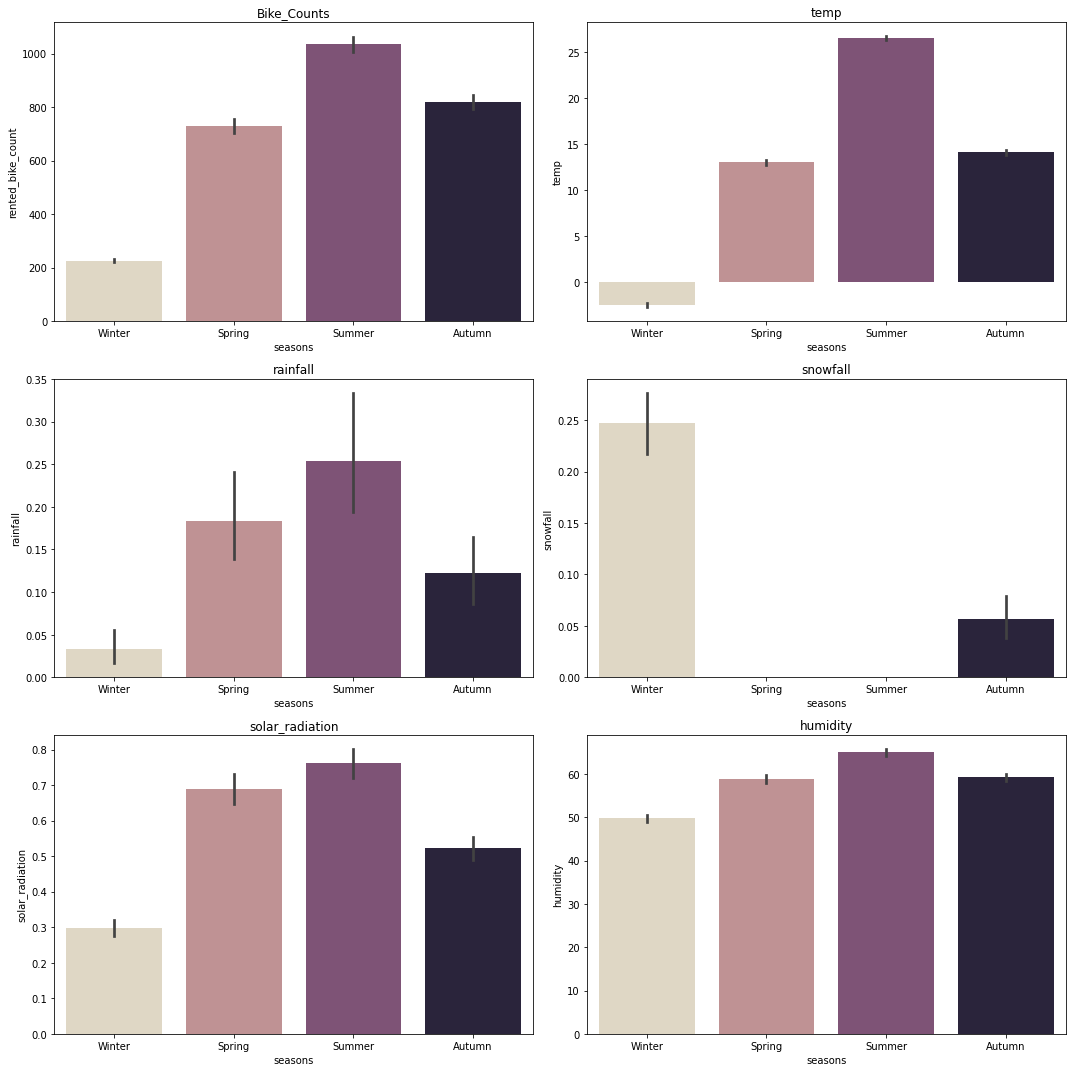

In [ ]:
s= [['rented_bike_count', 'temp'], ['rainfall', 'snowfall'], ['solar_radiation', 'humidity']]
title = [['Bike_Counts', 'temp'], ['rainfall', 'snowfall'], 
         ['solar_radiation', 'humidity']]

f, ax = plt.subplots(3,2,figsize=(15,15))

for i in range(3):
    for j in range(2):
        sns.barplot(data=df, x='seasons', y=s[i][j], ax=ax[i][j], color='r',palette='ch:s=-.2,r=.6')
        ax[i][j].set_title(title[i][j])

plt.tight_layout()  


The number of bikes rented in the months of December, January, and February is very less compared to that of other months.

There are very less number of bikes being rented in winter, and it is the highest in the summer.



In [ ]:
pd.pivot_table(df, index=['holiday', 'func_day'], columns='seasons', values='rented_bike_count',
               aggfunc=lambda x: len(x), margins=True, margins_name='TOTAL')

seasons              Autumn  Spring  Summer  Winter  TOTAL
holiday    func_day                                       
Holiday    No          24.0     NaN     NaN     NaN     24
           Yes         96.0    72.0    48.0   192.0    408
No Holiday No         223.0    48.0     NaN     NaN    271
           Yes       1841.0  2088.0  2160.0  1968.0   8057
TOTAL                2184.0  2208.0  2208.0  2160.0   8760

# **Feature engineering and selection:**

In [ ]:
df.head()

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,month
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1


In [ ]:
df['func_day'].value_counts()

Yes    8465
No      295
Name: func_day, dtype: int64

In [ ]:
df['holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: holiday, dtype: int64

Since the func_day and the holiday attribute contains only 2 type of entries each, it can be easily be encoded (one-hot encoding).

In [ ]:
df['seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: seasons, dtype: int64

Also, there are only 4 seasons in the season attribute. Hence we can perform label encoding on it.

In [ ]:
# encoding

df = pd.get_dummies(df)

In [ ]:
df.head()

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,month,seasons_Autumn,seasons_Spring,seasons_Summer,seasons_Winter,holiday_Holiday,holiday_No Holiday,func_day_No,func_day_Yes
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0,0,0,1,0,1,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,0,0,1,0,1,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0,0,0,1,0,1,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0,0,0,1,0,1,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0,0,0,1,0,1,0,1


Dropping some attributes which are complementary to each other.

(In the updated dataset, we're dropping the holiday_No Holiday, and func_day_No columns)

In [ ]:
df.drop(['func_day_No', 'holiday_No Holiday'], axis=1, inplace=True)

In [ ]:
df.head()

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,month,seasons_Autumn,seasons_Spring,seasons_Summer,seasons_Winter,holiday_Holiday,func_day_Yes
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0,0,0,1,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,0,0,1,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0,0,0,1,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0,0,0,1,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0,0,0,1,0,1


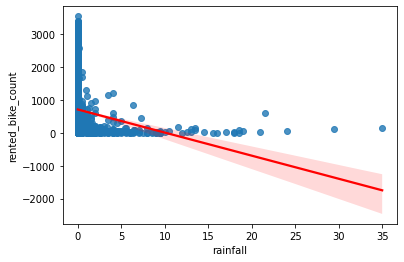

In [ ]:
sns.regplot(x=df['rainfall'],y=df["rented_bike_count"],line_kws={"color": "r"})


In [ ]:
df[df['rainfall']==0].shape[0]/8760*100

93.97260273972603

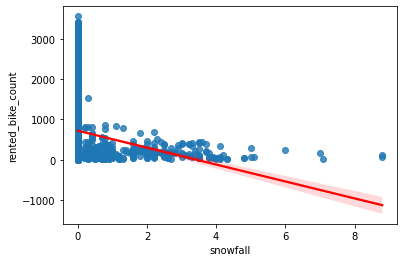

In [ ]:
sns.regplot(x=df['snowfall'],y=df["rented_bike_count"],line_kws={"color": "r"})

In [ ]:
df[df['snowfall']==0].shape[0]/8760*100

94.94292237442923

Approximately 94% of the entries indicate 0 snowfall/ rainfall at a given hour.

To simplify our model, we can change these attributes from continuous to binary (0 and 1) where 0 indicates that no snowfall/ rainfall was recorded at that particular hour, else 1.

In [ ]:
df['snowfall'] = df['snowfall'].apply(lambda x: 0 if x==0 else 1)
df['rainfall'] = df['rainfall'].apply(lambda x: 0 if x==0 else 1)

In [ ]:
df.head()

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,month,seasons_Autumn,seasons_Spring,seasons_Summer,seasons_Winter,holiday_Holiday,func_day_Yes
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,1,0,0,0,1,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,1,0,0,0,1,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,1,0,0,0,1,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,1,0,0,0,1,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,1,0,0,0,1,0,1


In [ ]:
df['snowfall'].value_counts()

0    8317
1     443
Name: snowfall, dtype: int64

In [ ]:
df.groupby('snowfall')['rented_bike_count'].mean()

snowfall
0    732.272935
1    185.101580
Name: rented_bike_count, dtype: float64

In [ ]:
df['rainfall'].value_counts()

0    8232
1     528
Name: rainfall, dtype: int64

In [ ]:
df.groupby('rainfall')['rented_bike_count'].mean()

rainfall
0    739.311103
1    163.456439
Name: rented_bike_count, dtype: float64

# **EDA:**

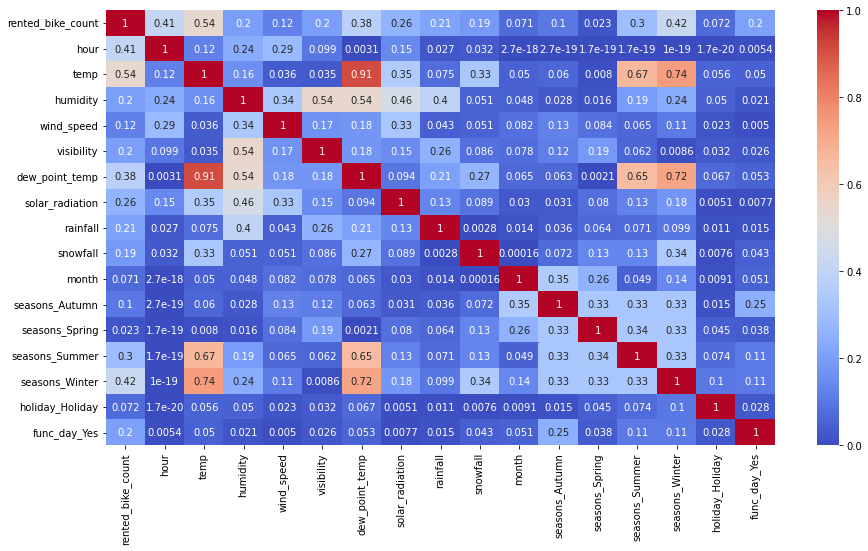

In [ ]:
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

The dew_point_temp, season_Summer, and season_Winter attributes show high correlation. Hence it can be dropped.

In [ ]:
df = df.drop(['dew_point_temp','seasons_Summer','seasons_Winter'], axis=1)

In [ ]:
df.head()

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,month,seasons_Autumn,seasons_Spring,holiday_Holiday,func_day_Yes
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0,0,1,0,0,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0,0,1,0,0,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0,0,1,0,0,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0,0,1,0,0,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0,0,1,0,0,0,1


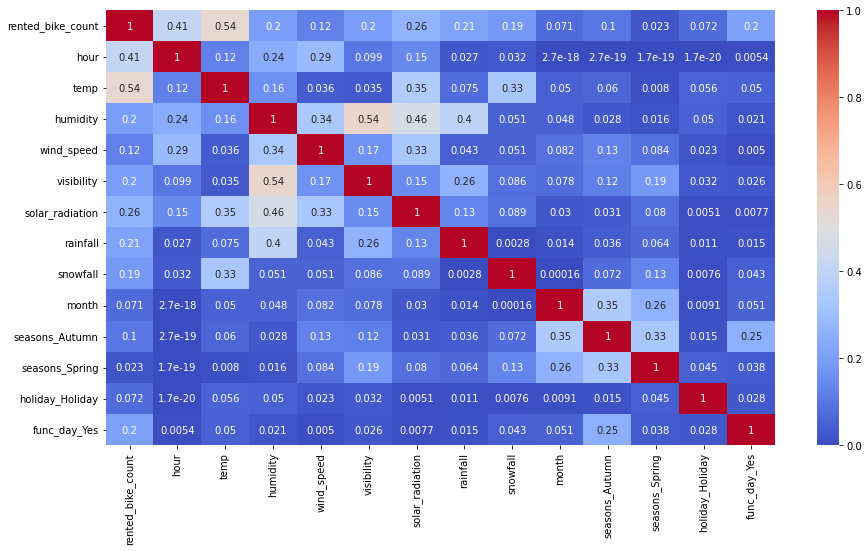

In [ ]:
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
###################################################

In [ ]:
df.columns

Index(['date', 'rented_bike_count', 'hour', 'temp', 'humidity', 'wind_speed',
       'visibility', 'solar_radiation', 'rainfall', 'snowfall', 'month',
       'seasons_Autumn', 'seasons_Spring', 'holiday_Holiday', 'func_day_Yes'],
      dtype='object')

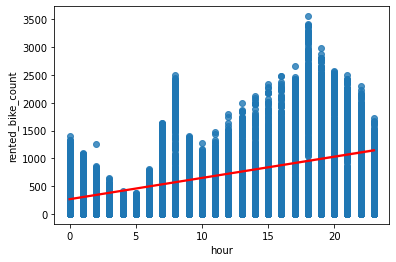

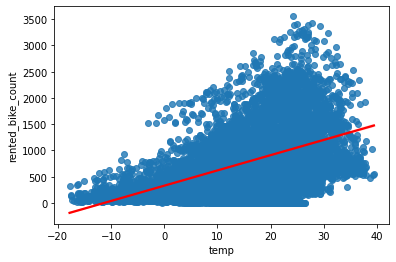

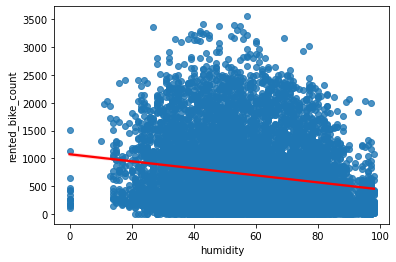

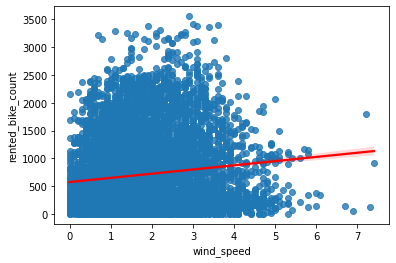

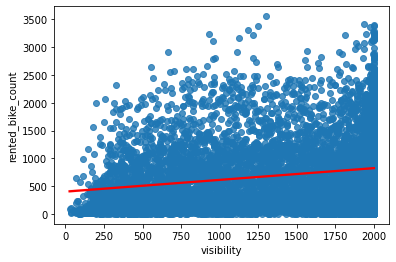

KeyError: ignored

In [ ]:
for column in ['rented_bike_count', 'hour', 'temp', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'month']:
  if column == 'rented_bike_count':
    pass
  else:
    sns.regplot(x=df[column],y=df["rented_bike_count"],line_kws={"color": "r"})
  
  plt.show()

In [ ]:
df.shape

In [ ]:
df['snowfall'].value_counts()

In [ ]:
# % of entries with 0 snowfall

8317/8700*100

In [ ]:
df['rainfall'].value_counts()

In [ ]:
# % of entries with 0 rainfall

8232/8700*100

In [ ]:
df['rainfall'].value_counts()


In [ ]:
df.head()

There are approximately 95% of the entries which indicate 0 snowfall/ rainfall. To simplify our model, we can change these attributes from continuous to binary form (0 and 1) where 0 indicates that there was no snowfall/ rainfall at that particular hour, and vice versa for 1.

In [ ]:
df['snowfall'] = df['snowfall'].apply(lambda x: 0 if x==0 else 1)
df['rainfall'] = df['rainfall'].apply(lambda x: 0 if x==0 else 1)

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['rented_bike_count'], color="c")

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(df['rented_bike_count']), color='c')

In [ ]:
sns.distplot(np.log10(df['rented_bike_count']+10),color="y")

In [ ]:
numeric_columns = ['rented_bike_count', 'hour', 'temp', 'humidity', 'wind_speed',
       'visibility', 'solar_radiation', 'rainfall', 'dew_point_temp',
       'snowfall']

In [ ]:
categorical_columns = ['holiday', 'func_day', 'seasons']

In [ ]:
for column in numeric_columns[:]:
  if column == 'rented_bike_count':
    pass
  else:
    sns.regplot(x=df[column],y=df["rented_bike_count"],line_kws={"color": "r"})
  
  plt.show()

In [ ]:
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
plt.figure(figsize=(15,8))
correlation = independent_var.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')